# MISURA DEL COEFFICIENTE DI VISCOSITA' DELLA GLICERINA

le misure sono state raccolti in due giorni differenti a temperature differenti

In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import os

dir_path = os.path.abspath('')
FILE1 = dir_path + '/../CSV/' + 'T=24.5°C.csv'
FILE2 = dir_path + '/../CSV/' + 'T=18.5°C.csv'

fr1 = pd.read_csv(FILE1)  # fileread
fr2 = pd.read_csv(FILE2)

T24 = np.array([np.array(fr1[str(i)]) for i in range(2,7)]) # s
T18 = np.array([np.array(fr2[str(i)]) for i in range(2,7)]) # s

d = 0.2 #m distanza percorsa in t

t_medie24 = np.array([np.mean(i) for i in T24])  # calcola le medie dei tempi per ogni diametro
bessel = len(t_medie24)/len(t_medie24-1)
sigma_t24 = np.sqrt(np.array([np.std(i)*bessel for i in T24])**2 + 0.01**2) # std propagata con sensibilità
v_medie24 = d / t_medie24  # calcola le medie delle velocità per ogni diametro
sigma_v_medie24 = np.abs(- 0.2 / t_medie24**2) * sigma_t24 # taylor p81


t_medie18 = np.array([np.mean(i) for i in T18])  # calcola le medie dei tempi per ogni diametro
bessel = len(t_medie18)/len(t_medie18-1)
sigma_t18 = np.sqrt(np.array([np.std(i)*bessel for i in T18])**2 + 0.01**2)  # std propagata con sensibilità
v_medie18 = d / t_medie18  # calcola le medie delle velocità per ogni diametro
sigma_v_medie18 = np.abs(- 0.2 / t_medie18**2) * sigma_t18

raggi = (np.array([2, 3, 4, 5, 6])/2)*0.001 # m


# legge di stokes: 
### $v_{limite} \propto r^2$

$ v_{limite} = \frac{2 g (\rho_{sferetta} - \rho_{liquido})}{9 \eta} r^2$

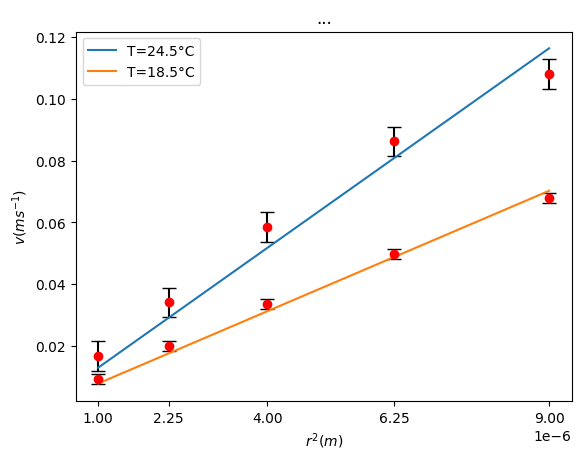


linearità BX
    
B: 7801.766224011961
sigmaB 229.68817992505507

sigmaY: 0.001658011148931817


linearità BX
    
B: 12929.382963453054
sigmaB 708.0523730328075

sigmaY: 0.004806713445220975



In [45]:
import matplotlib.pyplot as plt
from interpolazione3 import RettaInterpolataB, final_val

r24 = RettaInterpolataB(raggi**2,v_medie24,weights=1/sigma_v_medie24**2)

plt.errorbar(raggi**2,v_medie24,yerr=r24.sigmaY, fmt='o',ecolor='black',capsize=5,color='red')
plt.plot(r24.x_best, r24.y_best, label="T=24.5°C")

r18 = RettaInterpolataB(raggi**2,v_medie18,weights=1/sigma_v_medie18**2)
plt.errorbar(raggi**2,v_medie18,yerr=r18.sigmaY, fmt='o',ecolor='black',capsize=5,color='red')
plt.plot(r18.x_best, r18.y_best, label="T=18.5°C")

plt.xticks(raggi**2)
plt.legend()
plt.title('...')
plt.xlabel("$r^2 (m)$")
plt.ylabel("$v (ms^{-1})$")

plt.show()

print(r18)
print(r24)

## misura di $\eta$

$B = \frac{2 g (\rho_{sferetta} - \rho_{liquido})}{9 \eta} \Rightarrow
\eta = \frac{2 g (\rho_{sferetta} - \rho_{liquido})}{9 B}
$


In [46]:
import numpy as np
from typing import Final as const

rho_sferetta: const = 7800
rho_glicerina: const = 1260
diff_densita: const = rho_sferetta - rho_glicerina
g :const = 9.81

B18 = r18.B
sigmaB18 = r18.sigmaB
B24 = r24.B
sigmaB24 = r24.sigmaB
T24 = 24.5
T18 = 15.5

costante = (2 * g * diff_densita)/ 9

viscosita24 = costante / B24
sigma_viscosita24 = costante * np.abs(-1/B24**2) * sigmaB24 # da taylor

print("viscosità 24.5°C: ",final_val(viscosita24,sigma_viscosita24,udm='poise'))
print("Attesi: ",np.round(np.exp(-2.18-0.099*T24)* 100,2))

viscosita18 = costante / B18
sigma_viscosita18 = costante * np.abs(-1/B18**2) * sigmaB18
print("viscosità 18.5°C",final_val(viscosita18,sigma_viscosita18,udm='poise'))
print("Attesi: ",np.round(np.exp(-2.18-0.099*T18)* 100,2))

viscosità 24.5°C:  1.1 ± 0.06 poise
Attesi:  1.0
viscosità 18.5°C 1.83 ± 0.05 poise
Attesi:  2.44
